In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import matplotlib
from matplotlib.colors import BoundaryNorm, ListedColormap

In [2]:
def x3e(C,D,p,v,d,a,ep):
    
    return ( p * C + v * ( (np.exp(a*D)-1) / (np.exp(a)-1) ) ) / ( p * C + v * ( (np.exp(a*D)-1) / (np.exp(a)-1) ) + d * D + ep )

Text(0.05, 1.02, '$(b)$')

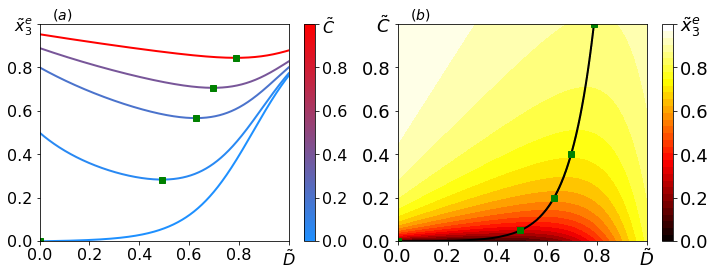

In [3]:
a = 8.84
v = 0.4
d = 0.1
p = 20*0.025
ep = 0.025

fig, axs = plt.subplots(1,2,figsize=(12,4))


# Figure A: 

colors = [(0, 'dodgerblue'), (1, 'red')]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_map", colors)
norm = matplotlib.colors.Normalize(0,1)

Ds = np.linspace(0,1,1000)
C_vals = [0,0.05,0.2,0.4,1.0]

D_min_vals = []
C_min_vals = [0,0.05,0.2,0.4,1.0]

for C in C_vals:
    
    axs[0].plot(Ds,x3e(D=Ds,C=C,p=p,v=v,d=d,a=a,ep=ep),linewidth=2,color=custom_cmap(C))
    
    x3e_min_val = np.min(x3e(D=Ds,C=C,p=p,v=v,d=d,a=a,ep=ep))
    D_min_val = Ds[np.argmin(x3e(D=Ds,C=C,p=p,v=v,d=d,a=a,ep=ep))]
    D_min_vals.append(D_min_val)
    
    axs[0].plot(D_min_val,x3e_min_val,color='green',markersize=6,marker='s')

    
axs[0].set_xlim(0,1)
axs[0].set_ylim(0,1)
    
cbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=custom_cmap), ax=axs[0])
cbar.set_ticks([0.0,0.2,0.4,0.6,0.8,1.0])
cbar.set_ticklabels(['0.0','0.2','0.4','0.6','0.8',r'$\tilde{C}$'])
cbar.ax.tick_params(labelsize=16) 

axs[0].set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
axs[0].set_yticklabels(['0.0','0.2','0.4','0.6','0.8',r'$\tilde{x}_3^e$'])
    
axs[0].set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
axs[0].set_xticklabels(['0.0','0.2','0.4','0.6','0.8',r'$\tilde{D}$'])
    
axs[0].tick_params(axis='both',labelsize=16)




# Figure B:

Css=np.linspace(0,1,1000)
Dss=np.linspace(0,1,1000)

Ds, Cs = np.meshgrid(Dss,Css)

min_vals_D = []
for C_val in Css:
    min_vals_D.append(Dss[np.argmin(x3e(D=Dss,C=C_val,p=p,v=v,d=d,a=a,ep=ep))])
min_vals_D_arr = np.array(min_vals_D)

Z = x3e(D=Ds,C=Cs,p=p,v=v,d=d,a=a,ep=ep)

custom_cmap ='hot'
norm = matplotlib.colors.Normalize(0,1)

clev = np.arange(0,1,0.05)

im = axs[1].contourf(Ds,Cs,Z,clev,cmap=custom_cmap)

cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.get_cmap('hot', 32)), ax=axs[1])

cbar.set_ticks([0.0,0.2,0.4,0.6,0.8,1.0])
cbar.set_ticklabels(['0.0','0.2','0.4','0.6','0.8',r'$\tilde{x}_3^e$'])
cbar.ax.tick_params(labelsize=18) 

axs[1].set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
axs[1].set_xticklabels(['0.0','0.2','0.4','0.6','0.8',r'$\tilde{D}$'])

axs[1].set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
axs[1].set_yticklabels(['0.0','0.2','0.4','0.6','0.8',r'$\tilde{C}$'])

axs[1].tick_params(axis='both',labelsize=18)

axs[1].plot(min_vals_D_arr,Css,'k',linewidth=2)
for i in range(len(D_min_vals)):
    axs[1].plot(D_min_vals[i],C_min_vals[i],color='green',markersize=6,marker='s')


fig.subplots_adjust(wspace=0.15)

axs[0].text(0.05,1.02,r'$(a)$',fontsize=14)
axs[1].text(0.05,1.02,r'$(b)$',fontsize=14)
